In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import re
from scipy import fft
%matplotlib inline

# Load measurements:

In [27]:
filenames=["DIF1Vpp1Hz.txt","DIF1Vpp10Hz.txt","DIF1Vpp100Hz.txt","DIF1Vpp500Hz.txt",
           "DIF1Vpp800Hz.txt","DIF1Vpp1KHz.txt","DIF1Vpp1.5KHz.txt","DIF1Vpp2KHz.txt"]

In [140]:
inpfreq=[]
for i in range(nfreq):
    times=1.
    iini=7
    ifin=len(filenames[i])-6
    if filenames[i][ifin-1:ifin]=="K": 
        ifin=ifin-1
        times=1e+3
    infreq=float(filenames[i][iini:ifin])*times
    inpfreq.append(infreq)

# Plot min and max voltaje:

In [131]:
npts=1024
iplot=int(npts/3)

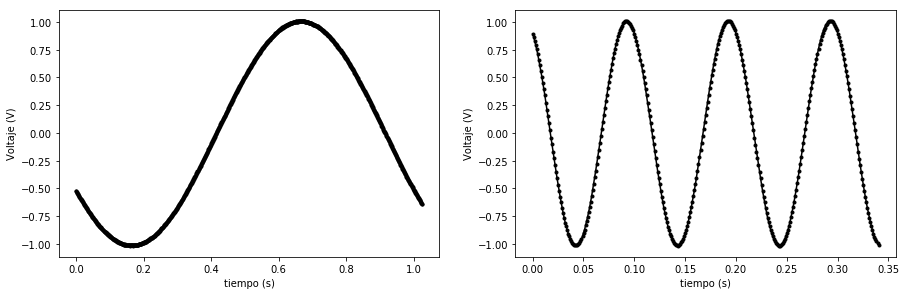

In [132]:
fig=plt.figure(figsize=(15,10))
ax1=plt.subplot(221)
plt.plot(data1Hz[0][:],data1Hz[1][:],'ko',markersize='3',
         linestyle='solid')
ax1.set_xlabel("tiempo (s)",fontsize=10)
ax1.set_ylabel("Voltaje (V)",fontsize=10)
ax1=plt.subplot(222)
plt.plot(data10Hz[0][0:iplot],data10Hz[1][0:iplot],'ko',
         markersize='3',linestyle='solid')
ax1.set_xlabel("tiempo (s)",fontsize=10)
ax1.set_ylabel("Voltaje (V)",fontsize=10)
plt.show()
#plt.savefig()

# Plot frequencies:

In [133]:
nfreq=len(filenames)

In [134]:
data=[]
for i in range(nfreq):
    print("open: ",filenames[i])
    dumm=np.loadtxt("IyC/"+filenames[i],delimiter=";")
    data.append(dumm)

open:  DIF1Vpp1Hz.txt
open:  DIF1Vpp10Hz.txt
open:  DIF1Vpp100Hz.txt
open:  DIF1Vpp500Hz.txt
open:  DIF1Vpp800Hz.txt
open:  DIF1Vpp1KHz.txt
open:  DIF1Vpp1.5KHz.txt
open:  DIF1Vpp2KHz.txt


In [135]:
def fourier(y):
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/rat
    frq = k/T # two sides frequency range
    imax=int(n/2)
    frq = frq[1:imax] # one side frequency range
    Y = fft(y)/n # fft computing and normalization
    Y = Y[1:imax]
    return Y,frq

In [136]:
global rat
rat=1000

computed frequency: 1.953125


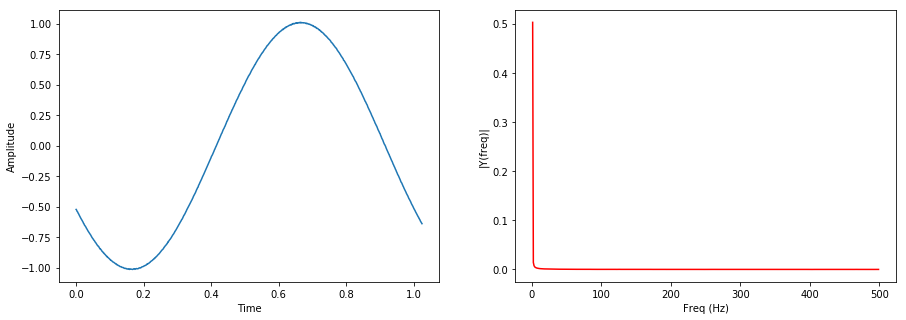

computed frequency: 9.765625


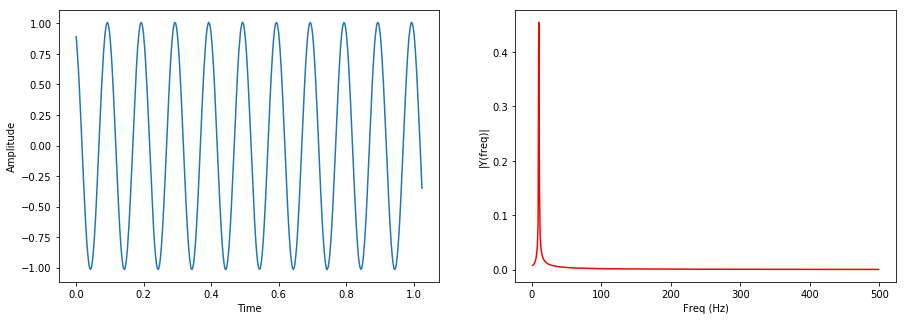

computed frequency: 100.5859375


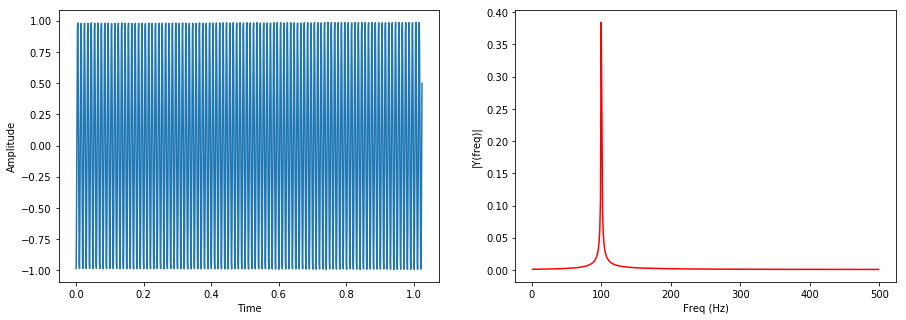

computed frequency: 499.0234375


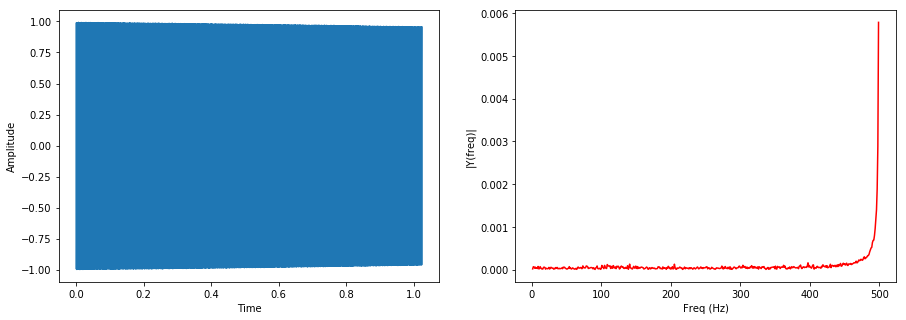

computed frequency: 200.1953125


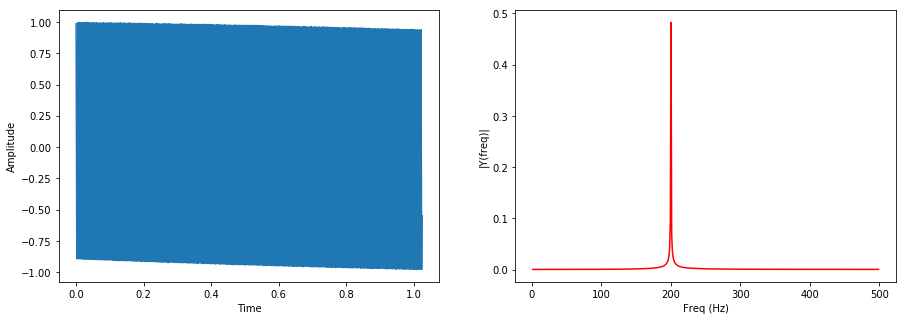

computed frequency: 458.984375


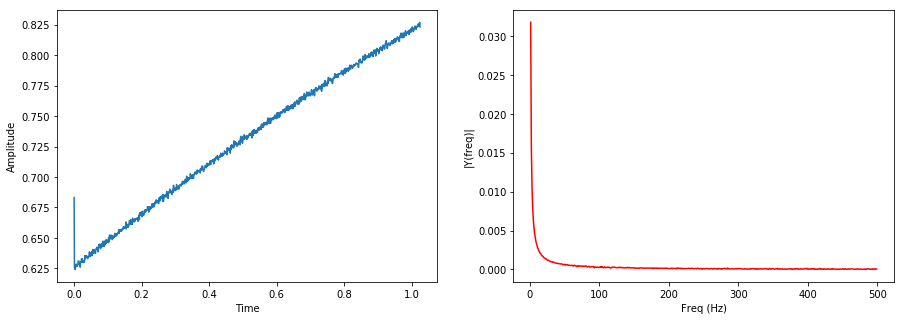

computed frequency: 163.0859375


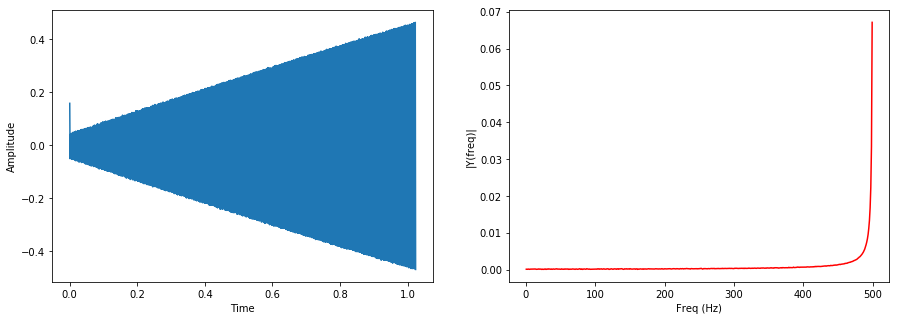

computed frequency: 339.84375


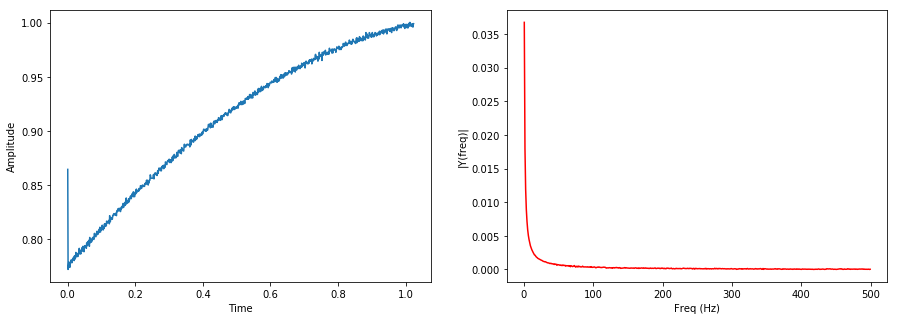

In [137]:
compfreq=[]
for i in range(nfreq):
    t=data[i][0]
    y=data[i][1]
    Y, frq=fourier(y)
    imax=np.argmax(Y)
    freq_max=frq[imax]
    compfreq.append(freq_max)
    print("computed frequency:",freq_max)
    fig=plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.plot(t,y)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(122)
    plt.plot(frq,abs(Y),'r') # plotting the spectrum
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|Y(freq)|')
    plt.show()

In [168]:
ifreq=2
print(filenames[ifreq])
t=data[ifreq][0]
y=data[ifreq][1]
Y, frq=fourier(y)

DIF1Vpp100Hz.txt


In [167]:
np.savetxt('transffourier_100Hz.txt', np.c_[frq,abs(Y)],delimiter=" ")

# Plot ADQ response in frequency

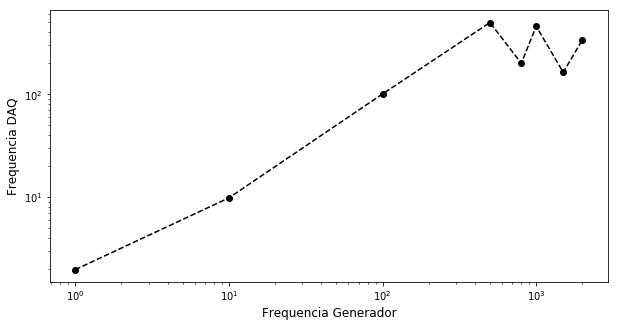

In [157]:
fig=plt.figure(figsize=(10,5))
ax=plt.subplot(111)
plt.plot(inpfreq,compfreq,'ko',linestyle='dashed')
plt.xscale("log")
plt.yscale("log")
ax.set_xlabel("Frequencia Generador",fontsize=12)
ax.set_ylabel("Frequencia DAQ",fontsize=12)
plt.savefig("DAQ_logfrequency.jpg")
plt.show()